# Data Comparison

In [18]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
from eval import *
# from utils import *
import pandas as pd
import numpy as np

In [3]:
from sklearn.preprocessing import MinMaxScaler

def plot_em_all(real, fake):
    if not isinstance(fake, list):
        fake = [fake]
    for x in fake:
        if isinstance(x, dict):
            for key, value in x.items():
                plot_corr_diff(real[key], fake[key], plot_diff=True)
                plt.show()
        else:
            assert isinstance(x, pd.DataFrame)
            plot_corr_diff(real, x, plot_diff=True)
            plt.show()

def plot_stats(real, fakes, is_dict=False, which='cat'):
    if not isinstance(fakes, list):
        fakes = [fakes]
    
    for fake in fakes:
        if is_dict:
            real_df, fake_df = real[which], fake[which]
        fig, ax = plt.subplots(1, 2, figsize=(12, 6))
        real_num_mean = np.log10(np.add(real_df.mean().values, 1e-5))
        fake_num_mean = np.log10(np.add(fake_df.mean().values, 1e-5))
        sns.scatterplot(x=real_num_mean, 
                        y=fake_num_mean, 
                        ax=ax[0])
        line = np.arange(min(real_num_mean + [-5]), max(real_num_mean + [10]))
        sns.lineplot(x=line, y=line, ax=ax[0])
        ax[0].set_title('Means of real and fake data')
        ax[0].set_xlabel('real data mean (log)')
        ax[0].set_ylabel('fake data mean (log)')

        real_cat_std = np.log10(np.add(real_df.std().values, 1e-5))
        fake_cat_std = np.log10(np.add(fake_df.std().values, 1e-5))
        line = np.arange(min(real_cat_std + [-5]), max(real_cat_std + [10]))
        sns.scatterplot(x=real_cat_std, 
                        y=fake_cat_std, 
                        ax=ax[1])
        sns.lineplot(x=line, y=line, ax=ax[1])
        ax[1].set_title('Stds of real and fake data')
        ax[1].set_xlabel('real data std (log)')
        ax[1].set_ylabel('fake data std (log)')
        plt.show()


In [12]:
def get_data(path_real, path_fake, real_sep=';', fake_sep=',', drop_columns=None):
    real = pd.read_csv(path_real, sep=real_sep, low_memory=False)
    fake = pd.read_csv(path_fake, sep=fake_sep, low_memory=False)
    shared_max = max(len(fake), len(real))
    real = real.sample(shared_max)
    if set(fake.columns.tolist()).issubset(set(real.columns.tolist())):
        real = real[fake.columns]
    elif drop_columns is not None:
        real = real.drop(drop_columns, axis=1)
        assert len(fake.columns.tolist()) == len(real.columns.tolist()), 'Real and fake do not have same nr of columns'
        fake.columns = real.columns
    else:
        fake.columns = real.columns
    for col in fake.columns:
        fake[col] = fake[col].astype(real[col].dtype)
    return real, fake

# Original TGAN

In [8]:
real, fake = get_data('../data/berka/berka_cat.csv', 'samples/berka_sample.csv')
tgan_org_evaluator = BaseDataEvaluator(real, fake)

1


In [49]:
tgan_org_evaluator.evaluate(target_col='trans_type', verbose=False, n_samples=10000)


Correlation metric: kendalltau
correlation values:
0.9789473684210527
0.9633214467651554
0.9759693825659514
0.8666666666666666
0.9999999999999999
Total: 0.7976619194896986


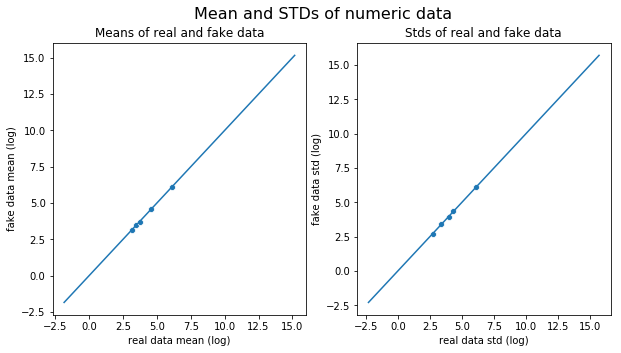

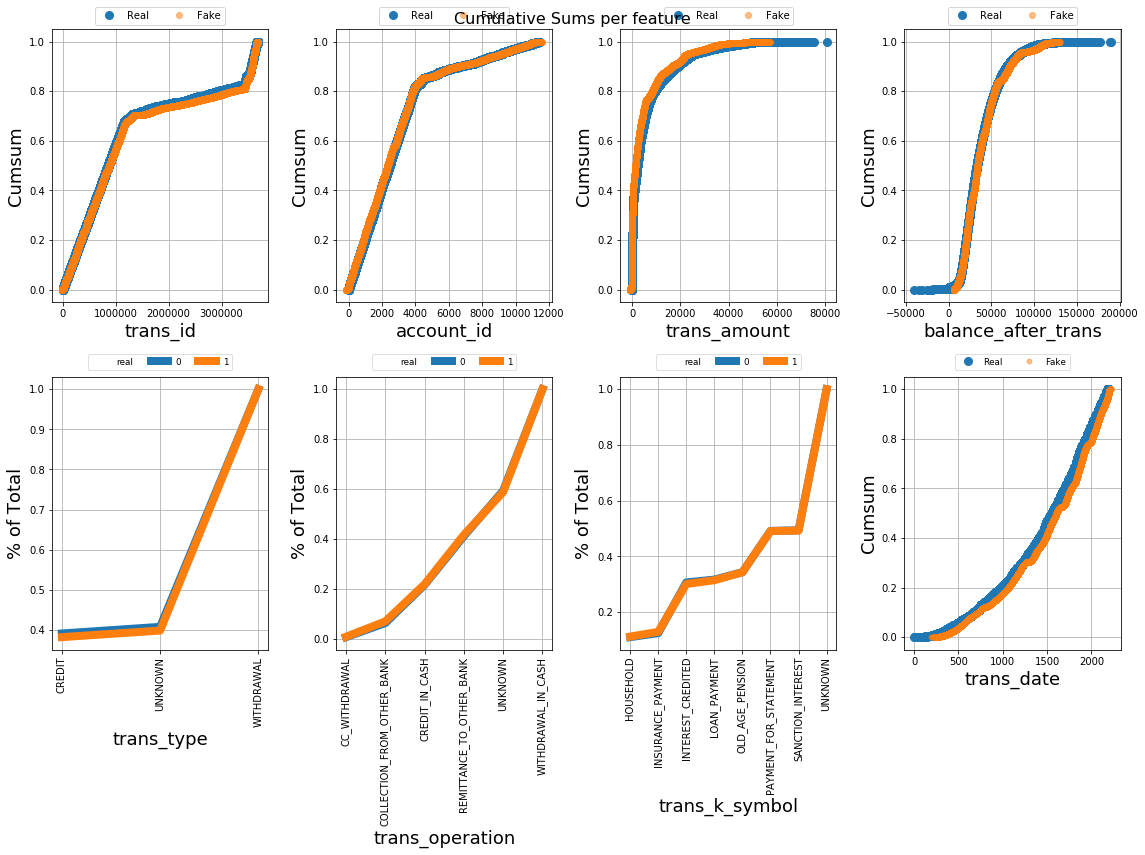

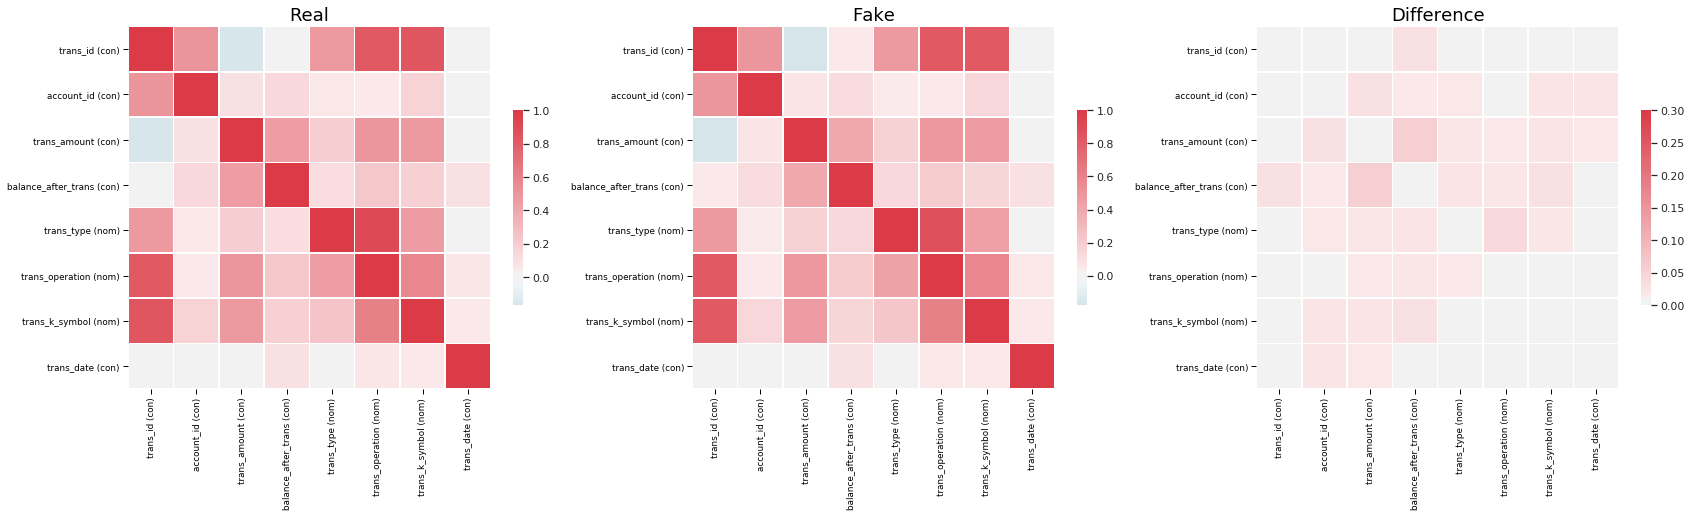

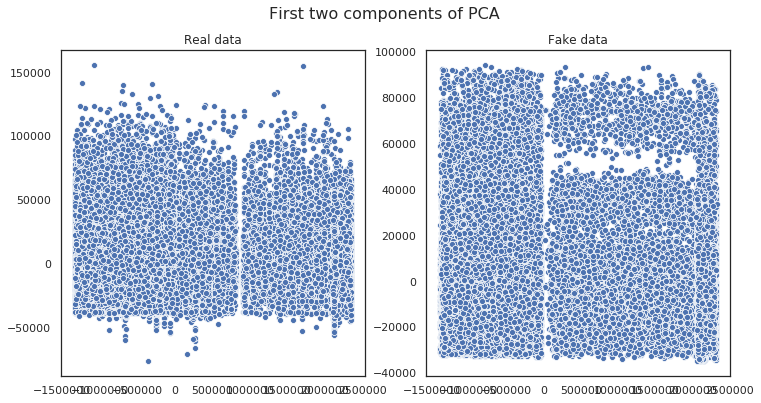

,values
Nr. of duplicate rows,0.0000
Euclidean distance correlations,0.1482
MAE distance correlations,0.0137


In [7]:
tgan_org_evaluator.visual_evaluation(annot=False)

# WGAN-GP Fixed

In [50]:
real, fake = get_data('../data/berka/berka_cat.csv', 'samples/berka_wgan_fixed_loss-TGAN-performance.csv')
wgan_evaluator = BaseDataEvaluator(real, fake)

In [54]:
wgan_evaluator.evaluate(target_col='trans_type', verbose=False)


Correlation metric: kendalltau
correlation values:
0.9894736842105263
0.9643402954661234
0.9597662355399968
0.8222222222222221
0.9999999999999999
Total: 0.7529900550744265


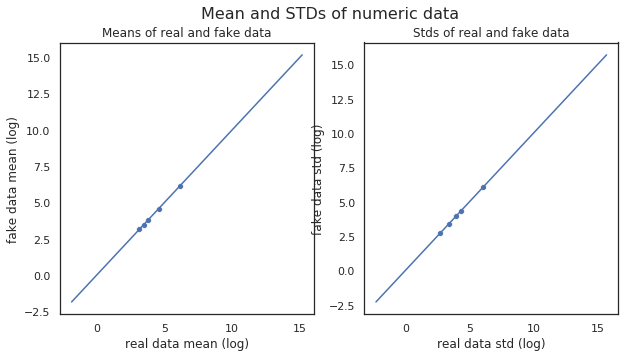

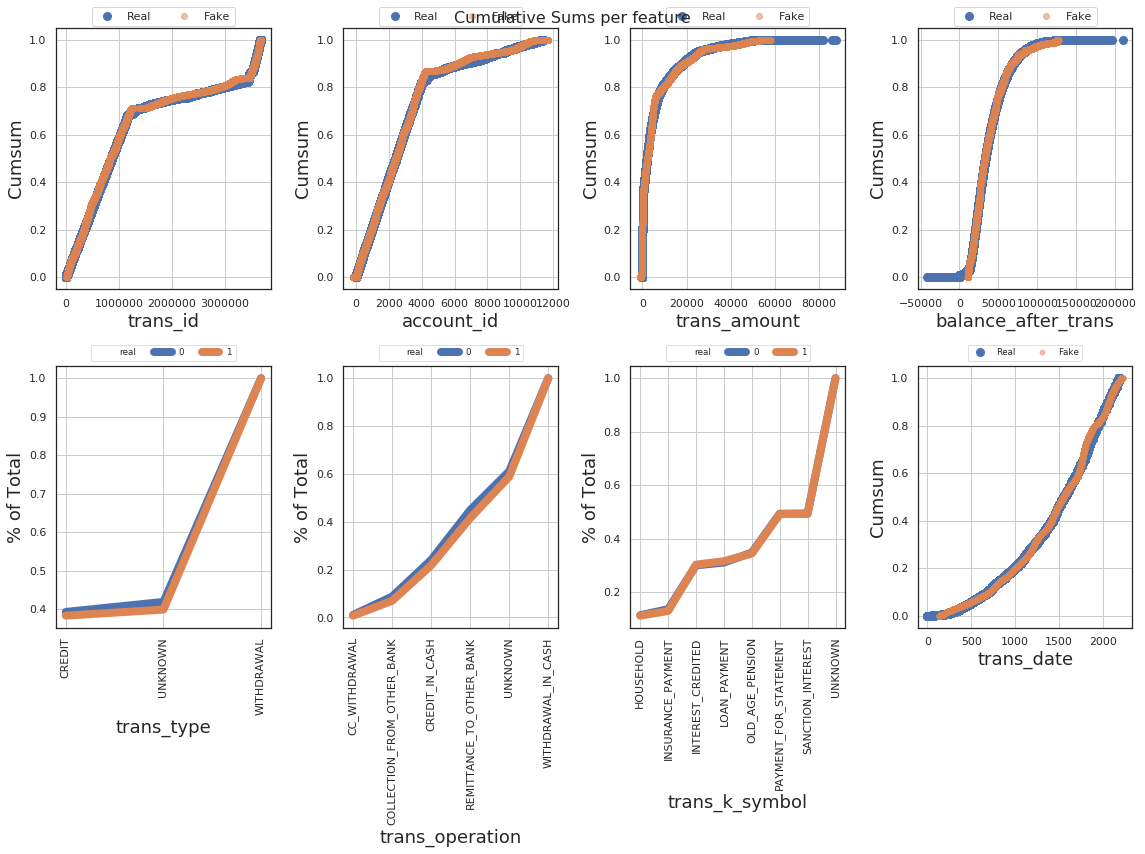

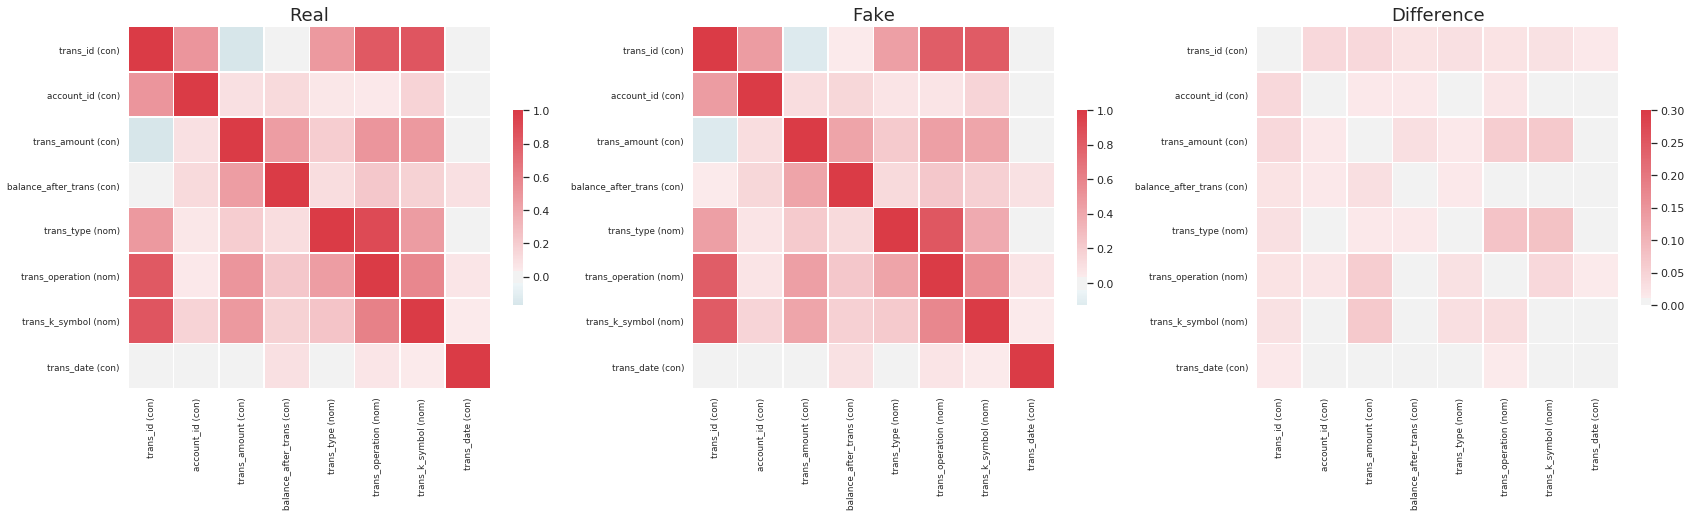

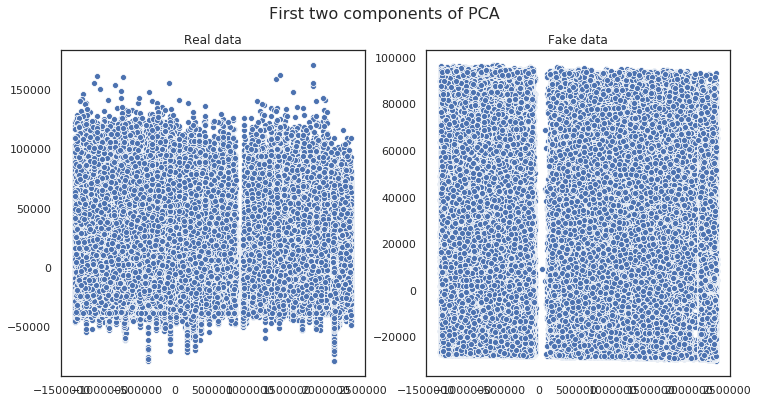

,values
Nr. of duplicate rows,0.0000
Euclidean distance correlations,0.2251
MAE distance correlations,0.0202


In [11]:
wgan_evaluator.visual_evaluation(annot=False)

# TGAN Skip Connections

In [12]:
real, fake = get_data('../data/berka/berka_cat.csv', '../TGAN/samples/berka_sample_tgan-skip-connections.csv')
skip_evaluator = BaseDataEvaluator(real, fake)

In [13]:
skip_evaluator.evaluate(target_col='trans_type', verbose=True)

                                                       real                   fake
mean_trans_id                                1,334,625.9216         1,343,534.4926
mean_account_id                                  2,937.7419             2,951.2300
mean_trans_amount                                5,891.1285             4,443.9657
mean_balance_after_trans                        38,453.8791            37,687.4639
mean_trans_date                                  1,466.7717             1,451.8567
median_trans_id                                858,533.0000           897,936.0000
median_account_id                                2,446.0000             2,508.0000
median_trans_amount                              2,097.0000               533.0000
median_balance_after_trans                      33,093.1000            30,930.0000
median_trans_date                                1,562.0000             1,596.0000
std_trans_id                                 1,226,838.5323         1,221,421.6017
std_

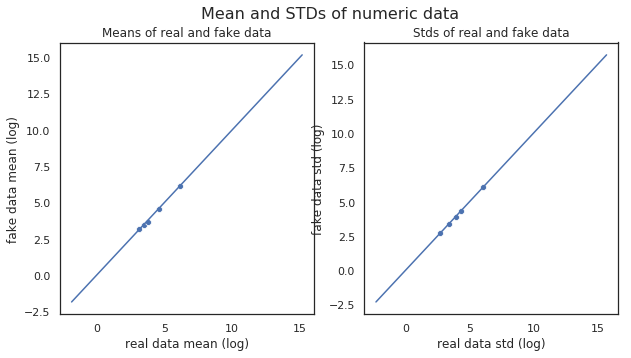

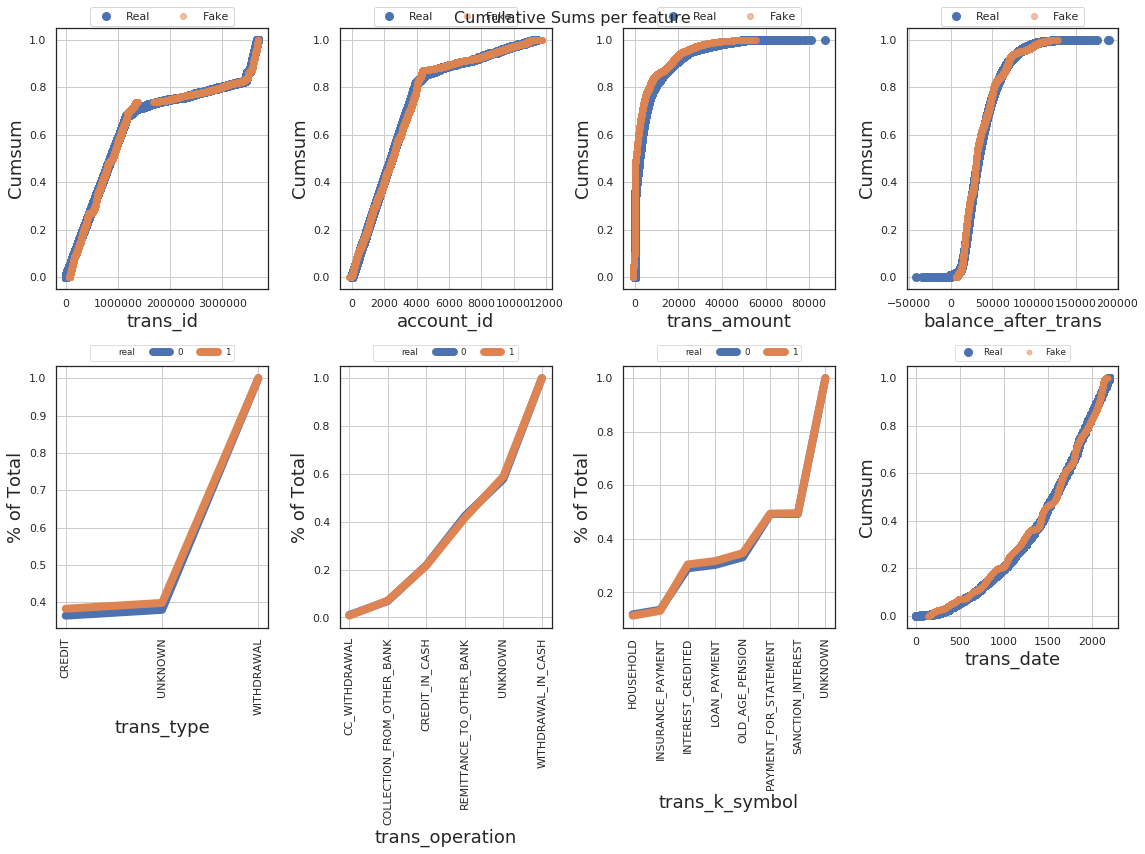

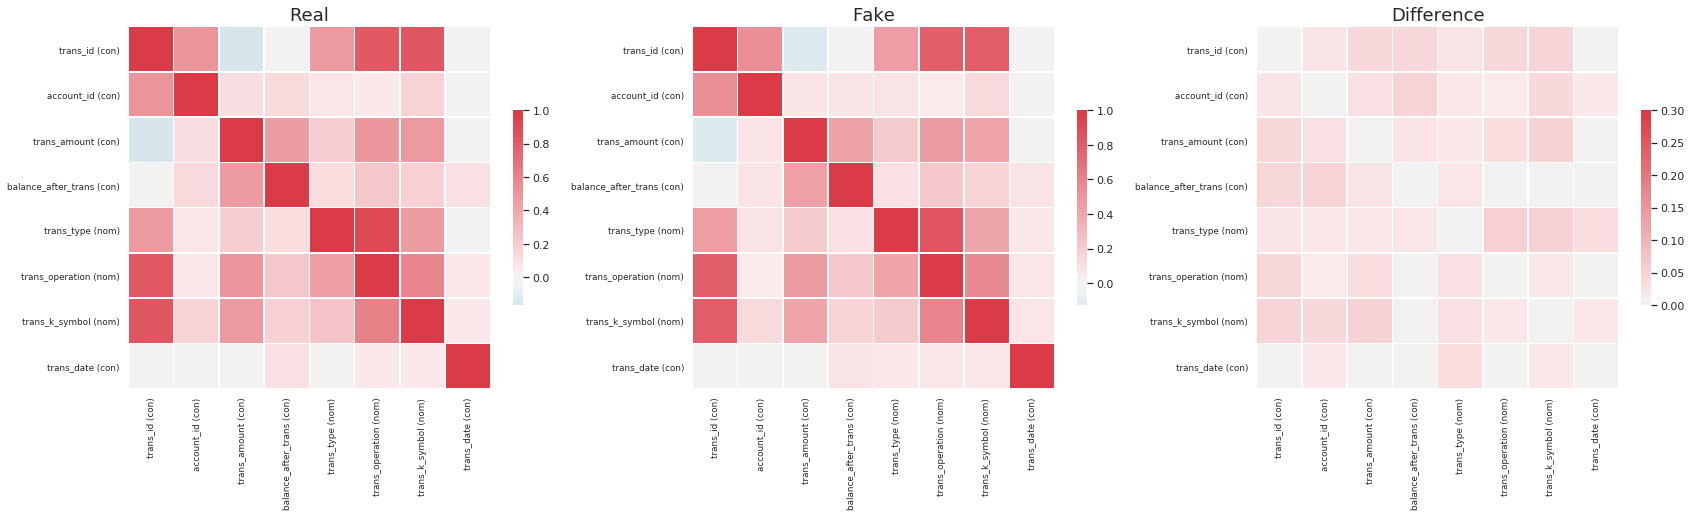

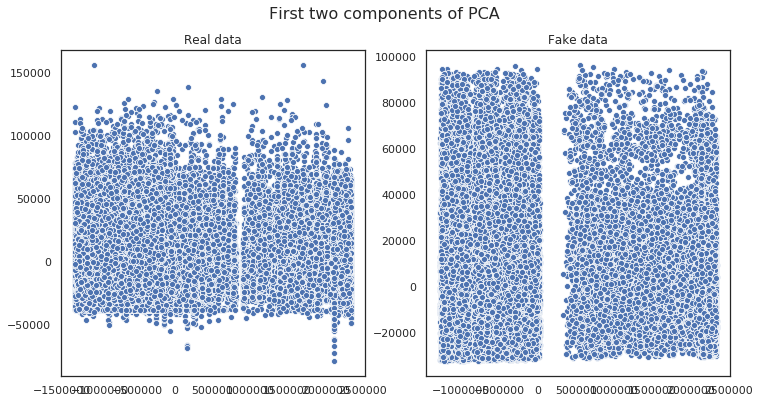

,values
Nr. of duplicate rows,0.0000
Euclidean distance correlations,0.2279
MAE distance correlations,0.0231


In [14]:
skip_evaluator.visual_evaluation(annot=False)

# 2 Layer Skip connections

In [15]:
real, fake = get_data('../data/berka/berka_cat.csv', '../TGAN/samples/berka_sample_tgan-skip-connections_2layerskip.csv')
skip_evaluator_2 = BaseDataEvaluator(real, fake)

In [16]:
skip_evaluator_2.evaluate(target_col='trans_type', verbose=True)

                                                       real                   fake
mean_trans_id                                1,340,613.4212         1,443,582.3503
mean_account_id                                  2,933.0499             3,162.8835
mean_trans_amount                                5,879.2197             4,472.6410
mean_balance_after_trans                        38,422.3617            41,935.5879
mean_trans_date                                  1,463.3068             1,474.3812
median_trans_id                                860,728.0000           967,929.0000
median_account_id                                2,433.0000             2,590.0000
median_trans_amount                              2,062.0000               563.0000
median_balance_after_trans                      33,166.1000            36,217.5000
median_trans_date                                1,558.0000             1,592.0000
std_trans_id                                 1,231,030.0481         1,232,294.7673
std_

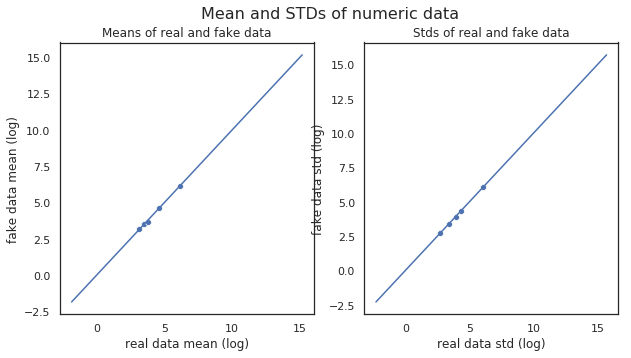

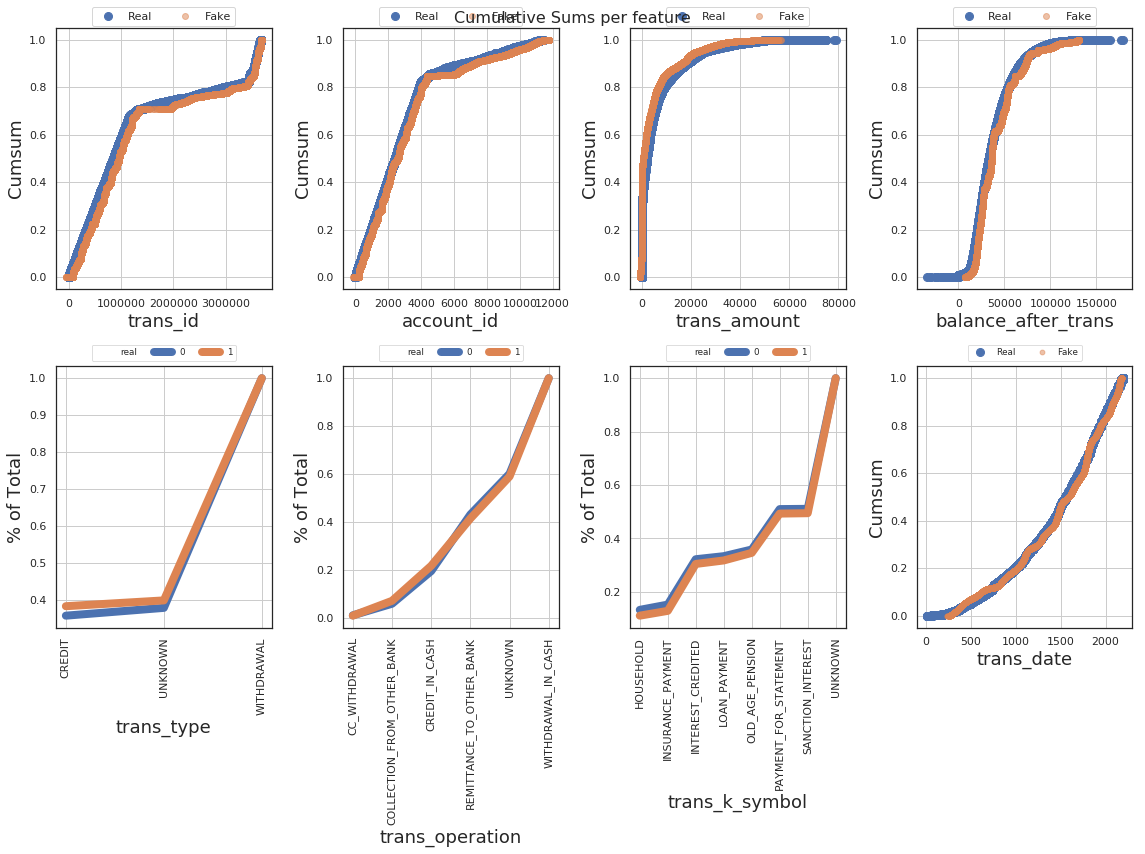

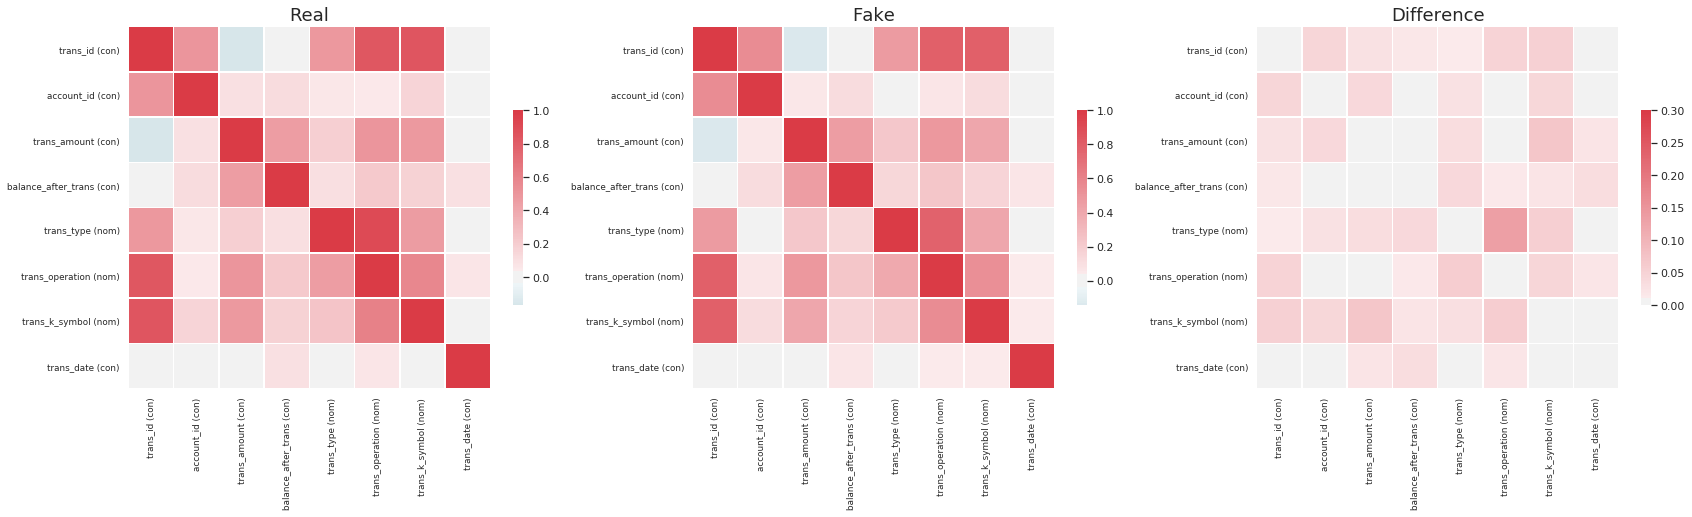

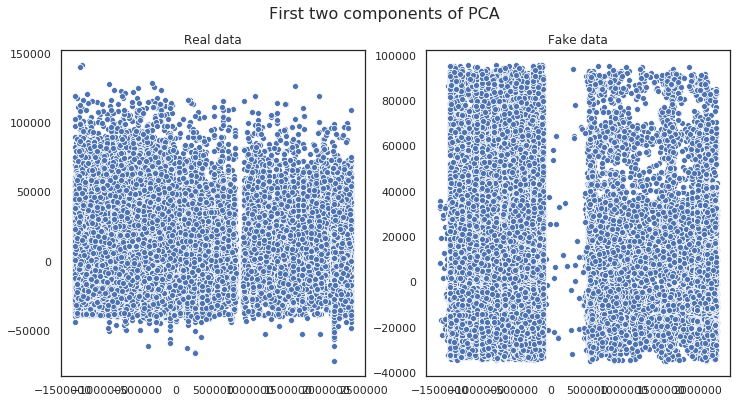

,values
Nr. of duplicate rows,0.0000
Euclidean distance correlations,0.2834
MAE distance correlations,0.0257


In [17]:
skip_evaluator_2.visual_evaluation(annot=False)

In [13]:
real, fake = get_data('../data/berka/berka_cat.csv', '/mnt/samples/sample_berka_<sdgym.synthesizers.medgan.MedganSynthesizer object at 0x7fec4e7784e0>_91.csv', drop_columns=['trans_bank_partner', 'trans_account_partner'])
skip_evaluator_2 = BaseDataEvaluator(real, fake)

In [17]:
skip_evaluator_2.evaluate(target_col='trans_type', verbose=True)


Correlation metric: kendalltau
                                               real               fake
mean_trans_id                        1,335,310.7043     2,035,061.2600
mean_account_id                          2,936.8673         6,299.0800
mean_trans_amount                        5,924.1457        44,791.8377
mean_balance_after_trans                38,518.3308       103,142.7737
mean_trans_date                          1,464.3121         1,485.8200
median_trans_id                        858,506.5000     2,025,470.5000
median_account_id                        2,434.0000         6,293.0000
median_trans_amount                      2,100.0000        44,642.7773
median_balance_after_trans              33,143.4000       103,123.2656
median_trans_date                        1,560.0000         1,514.0000
std_trans_id                         1,227,486.5084        74,190.3444
std_account_id                           2,477.3451           251.8395
std_trans_amount                         9,52

ValueError: operands could not be broadcast together with shapes (1056320,) (50,) 

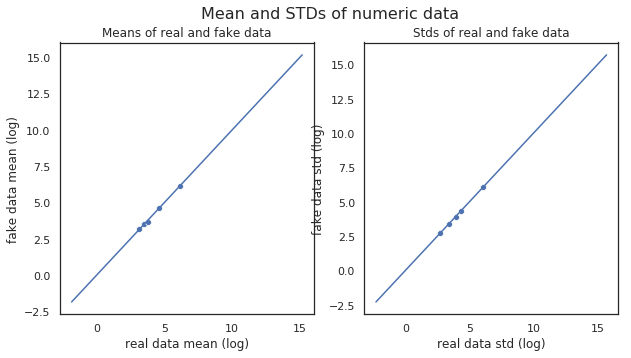

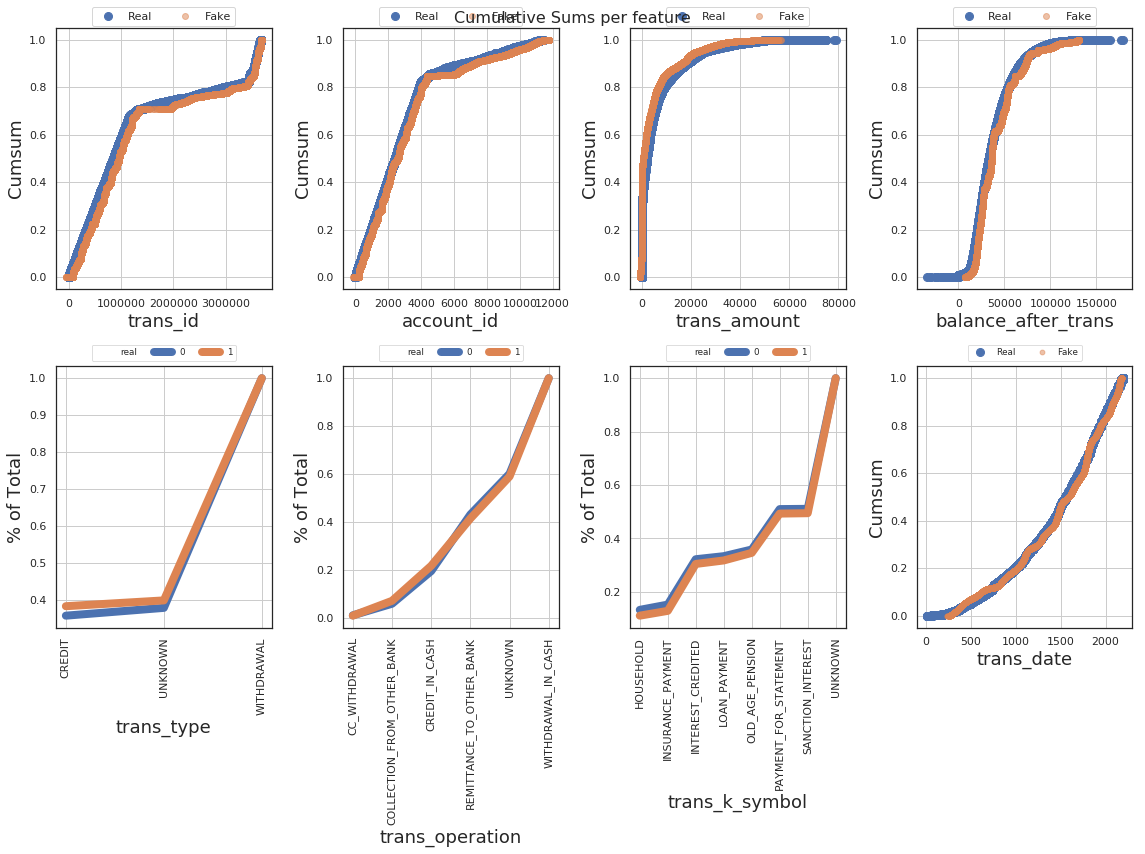

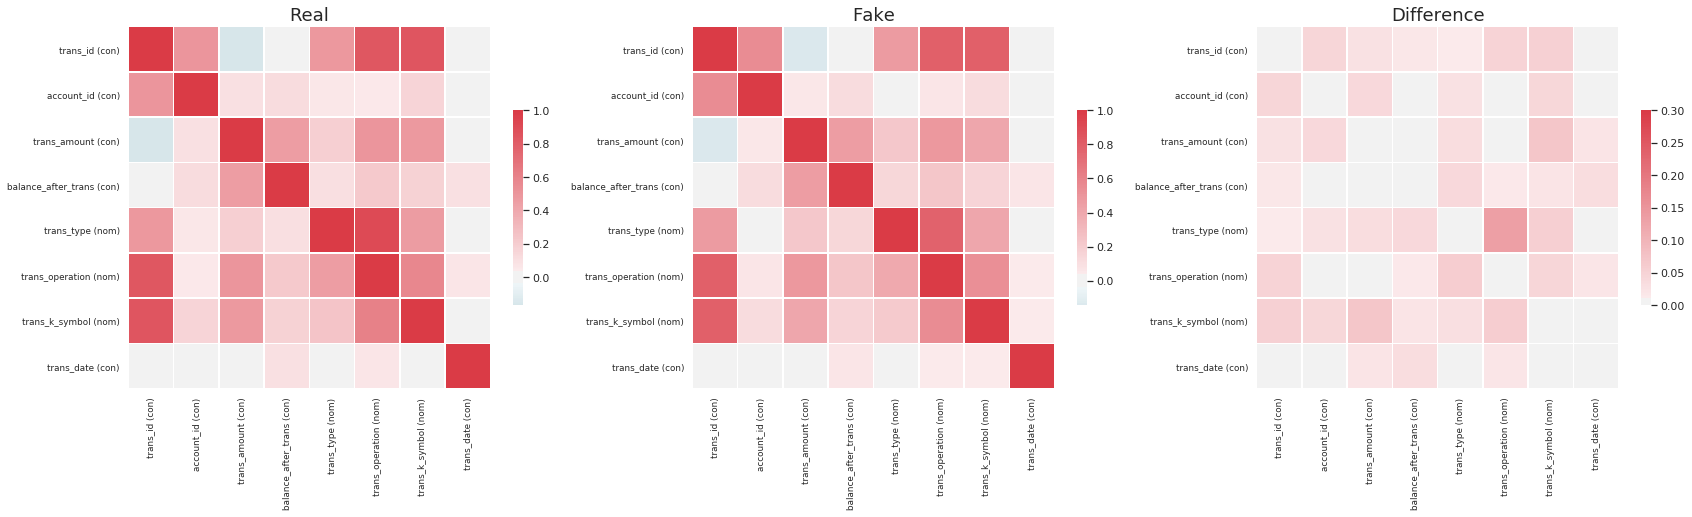

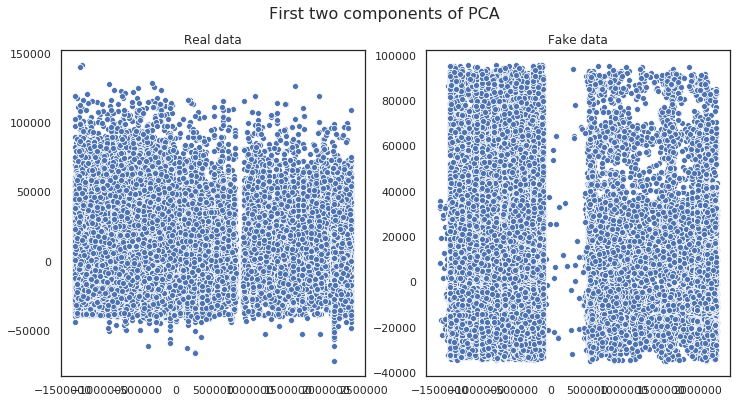

,values
Nr. of duplicate rows,0.0000
Euclidean distance correlations,0.2834
MAE distance correlations,0.0257


In [17]:
skip_evaluator_2.visual_evaluation(annot=False)

# Tickets

In [4]:
def get_data(ds):
    real = {'num': pd.read_csv(f'../data/{ds}/{ds}.csv', sep=';'), 'cat': pd.read_csv(f'../data/{ds}/{ds}_cat.csv', sep=';')}
    real['cat'] = real['cat'][real['num'].columns.tolist()]
    fake = {'cat': pd.read_csv(f'samples/{ds}/{ds}_OI_11_00_fake_backtransformed.csv', sep=';'), 'num': pd.read_csv(f'samples/{ds}/{ds}_OI_11_00_fake.csv', sep=';')}
    assert len(real['num'].columns) == len(fake['num'].columns) == len(real['cat'].columns) == len(fake['cat'].columns), f'Number of columns doesnt match'
    return real, fake

In [17]:
real, fake = get_data('Ticket')

/home/bauke/anaconda3/envs/p3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


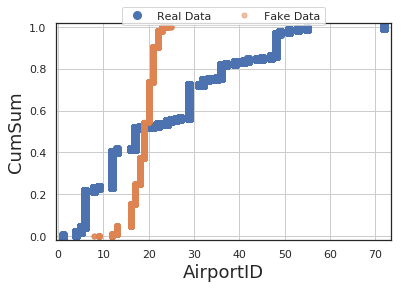

In [27]:
col = 'OriginStateFips'
r = real['num'][col]
f = fake['num'].iloc[:, real['num'].columns.tolist().index(col)]
cdf(r, f, 'AirportID', 'CumSum')

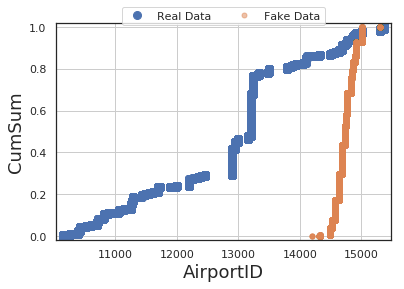

In [28]:
r = real['num'].DestAirportID
f = fake['num'].iloc[:, real['num'].columns.tolist().index('DestAirportID')]
cdf(r, f, 'AirportID', 'CumSum')

/home/bauke/anaconda3/envs/p3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


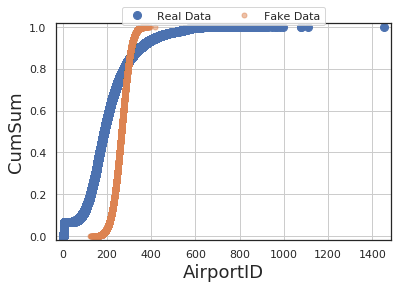

In [18]:
col = 'MktFare'
cdf(real['num'][col], fake['num'].iloc[:, real['num'].columns.tolist().index(col)], 'AirportID', 'CumSum')

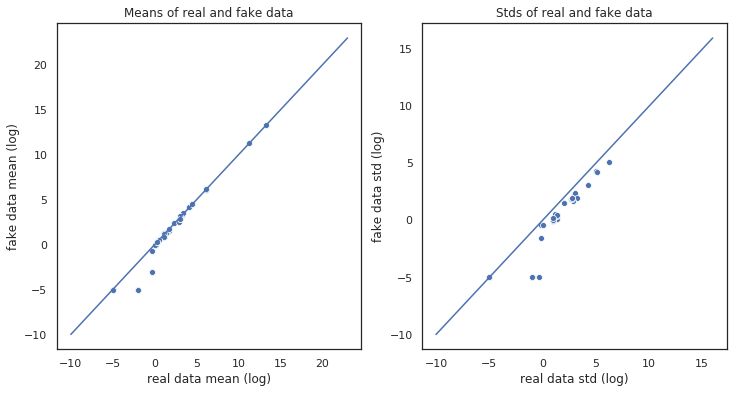

In [33]:
plot_stats(real, fake, which='num')

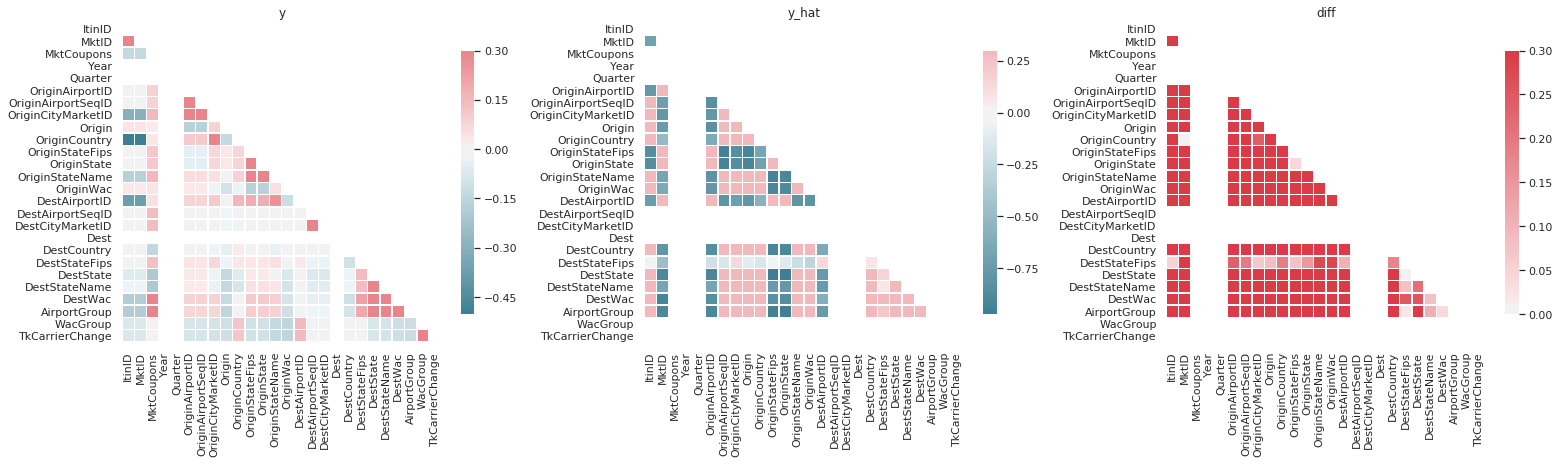

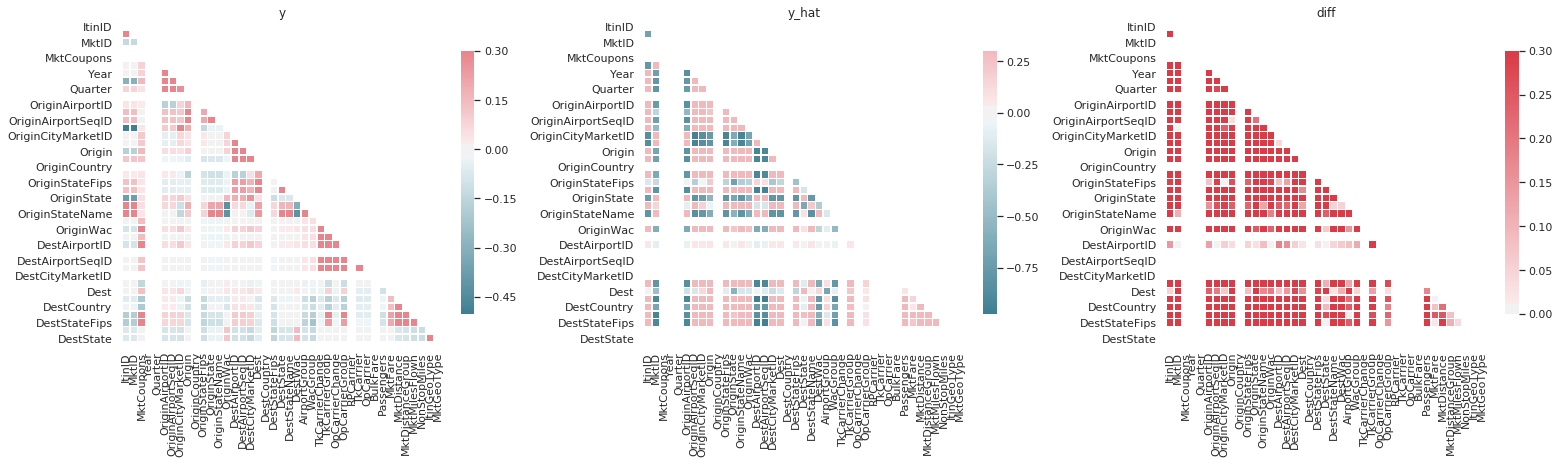

In [35]:
plot_em_all(real, [fake])

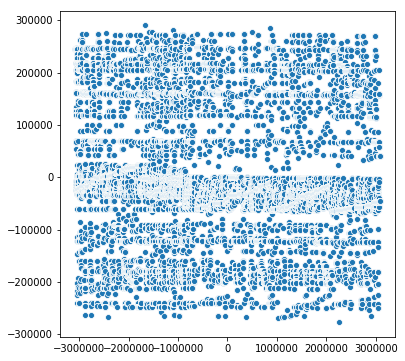

In [15]:
plot_dim_red(real['num'])

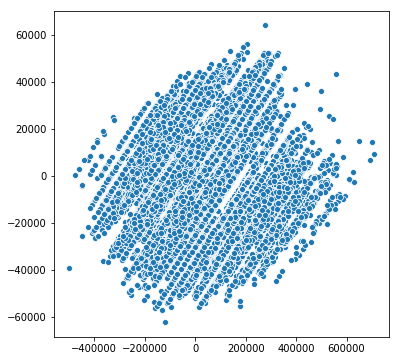

In [16]:
plot_dim_red(fake1['num'])

In [14]:
eucl_corr(real['num'], fake1['num'])

20.162619046708723

# Berka

In [51]:
real, fake = get_data('berka')

/home/bauke/anaconda3/envs/p3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3214: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [52]:
len(real['num'])

1056320

In [39]:
for x in real.keys():
    real[x] = real[x][:round(len(real[x]) / 1000.0) * 1000]

In [21]:
fake['cat'].head()

,account_id,trans_amount,balance_after_trans,trans_type,trans_operation,trans_date
0,1166,9900,34221,CREDIT,COLLECTION_FROM_OTHER_BANK,559.0
1,1515,14404,45595,CREDIT,COLLECTION_FROM_OTHER_BANK,1340.0
2,3347,5358,16956,CREDIT,REMITTANCE_TO_OTHER_BANK,1967.0
3,5120,7258,22579,UNKNOWN,WITHDRAWAL_IN_CASH,1110.0
4,617,10353,34762,WITHDRAWAL,REMITTANCE_TO_OTHER_BANK,1999.0


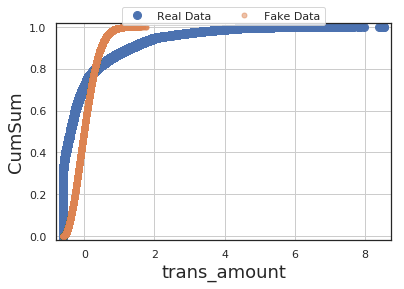

In [42]:
col = 'trans_amount'
cdf(real['num'][col], fake['num'].iloc[:, real['num'].columns.tolist().index(col)], col, 'CumSum')

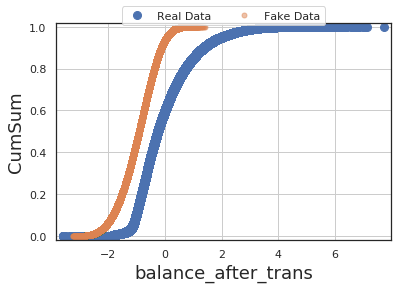

In [43]:
col = 'balance_after_trans'
cdf(real['num'][col], fake['num'].iloc[:, real['num'].columns.tolist().index(col)], col, 'CumSum')

/home/bauke/anaconda3/envs/p3.6/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in log10
/home/bauke/anaconda3/envs/p3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in log10


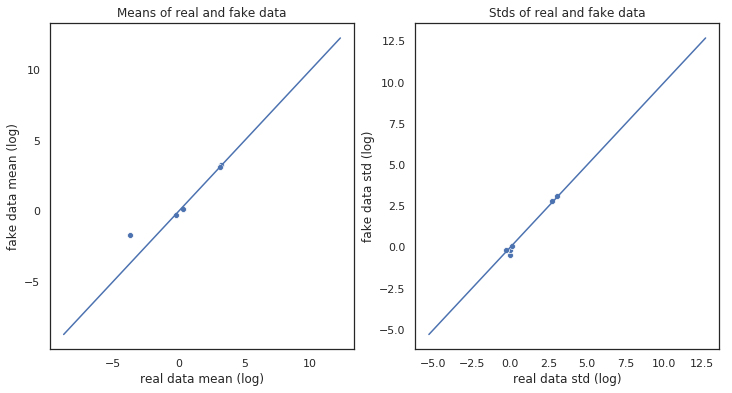

In [44]:
plot_stats(real, fake)

[[ 1.          0.09996145  0.1280243   0.00369982]
 [ 0.09996145  1.          0.45727409 -0.00488605]
 [ 0.1280243   0.45727409  1.          0.09689117]
 [ 0.00369982 -0.00488605  0.09689117  1.        ]]
[[ 1.          0.01136447  0.01225498  0.00596509]
 [ 0.01136447  1.          0.81013701  0.20137025]
 [ 0.01225498  0.81013701  1.         -0.04885212]
 [ 0.00596509  0.20137025 -0.04885212  1.        ]]
[[0.         0.08859698 0.11576932 0.00226526]
 [0.08859698 0.         0.35286292 0.20625631]
 [0.11576932 0.35286292 0.         0.14574329]
 [0.00226526 0.20625631 0.14574329 0.        ]]


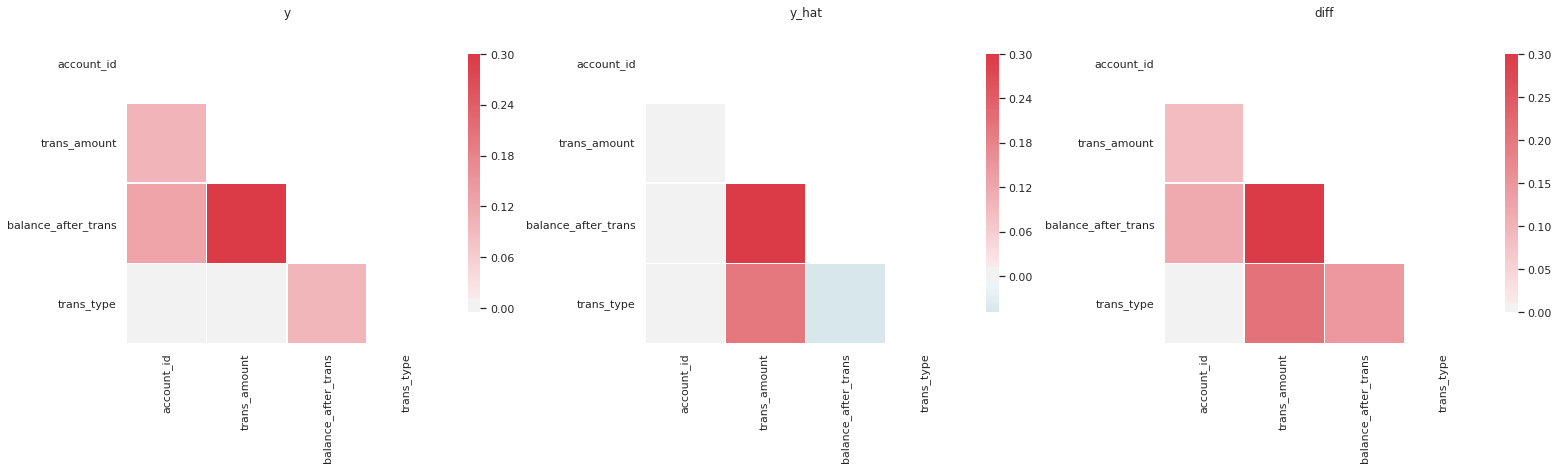

[[ 1.          0.01827771 -0.04199954 -0.02616205 -0.0178587   0.50693967]
 [ 0.01827771  1.          0.45727409 -0.13913725 -0.43907939 -0.00488605]
 [-0.04199954  0.45727409  1.         -0.08960648 -0.16166692  0.09689117]
 [-0.02616205 -0.13913725 -0.08960648  1.          0.41237358  0.02438907]
 [-0.0178587  -0.43907939 -0.16166692  0.41237358  1.          0.04990107]
 [ 0.50693967 -0.00488605  0.09689117  0.02438907  0.04990107  1.        ]]
[[ 1.          0.12885702 -0.10228091  0.12339779  0.07897068  0.65667228]
 [ 0.12885702  1.          0.81013339  0.18241268  0.10573955  0.20136834]
 [-0.10228091  0.81013339  1.          0.29056994  0.19313252 -0.04885354]
 [ 0.12339779  0.18241268  0.29056994  1.          0.20034711  0.21246972]
 [ 0.07897068  0.10573955  0.19313252  0.20034711  1.          0.04328861]
 [ 0.65667228  0.20136834 -0.04885354  0.21246972  0.04328861  1.        ]]
[[0.         0.11057931 0.06028138 0.14955984 0.09682938 0.14973261]
 [0.11057931 0.         0.352

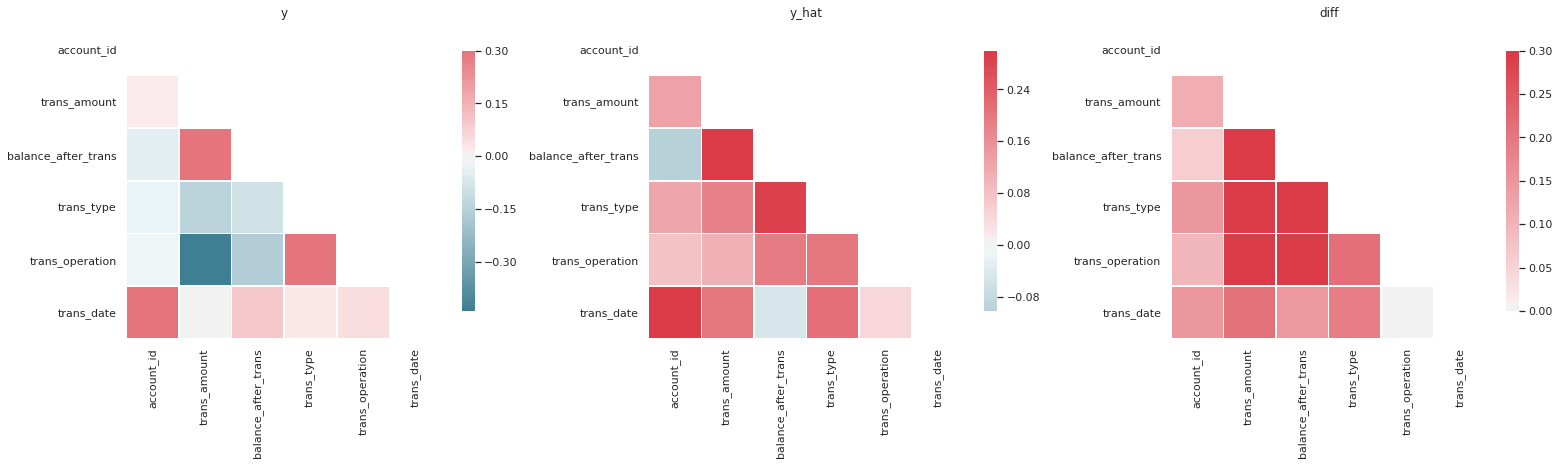

In [50]:
plot_em_all(real, fake)

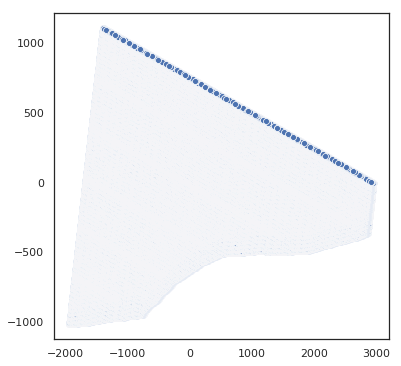

In [46]:
plot_dim_red(real['num'])

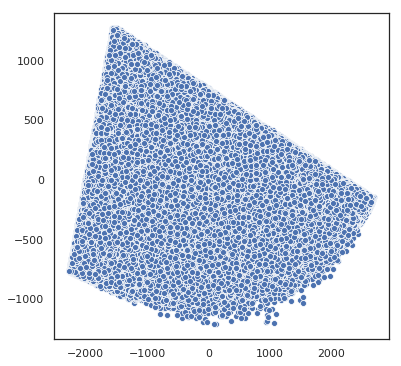

In [47]:
plot_dim_red(fake['num'])

In [15]:
real['cat'].sample(20).append(fake['cat'].sample(20)).sample(30).reset_index()

,index,account_id,trans_amount,balance_after_trans,trans_type,trans_operation,trans_date
0,271730,2489,14.6,16987.4,WITHDRAWAL,WITHDRAWAL_IN_CASH,1125.0
1,962379,10068,34145.0,53136.0,CREDIT,CREDIT_IN_CASH,2077.0
2,373467,2225,98.5,24269.1,CREDIT,UNKNOWN,1338.0
3,427109,9138,216.1,51856.4,CREDIT,UNKNOWN,1429.0
4,984893,9472,6660.0,19643.0,CREDIT,CREDIT_IN_CASH,970.0
5,99842,3035,316.5,75100.5,CREDIT,UNKNOWN,668.0
6,759176,1281,700.0,54230.9,WITHDRAWAL,WITHDRAWAL_IN_CASH,1844.0
7,747445,688,6309.0,15996.0,CREDIT,COLLECTION_FROM_OTHER_BANK,1858.0
8,542199,1904,7531.0,19981.0,CREDIT,COLLECTION_FROM_OTHER_BANK,1755.0
9,726153,136,14.6,14763.0,WITHDRAWAL,WITHDRAWAL_IN_CASH,1825.0


# Paysim

In [1]:
real, fake = get_data('paysim')

NameError: name 'get_data' is not defined

In [ ]:
plot_stats(real, fake)

In [ ]:
plot_em_all(real, fake)

In [ ]:
plot_dim_red(real['num'])

In [ ]:
plot_dim_red(fake['num'])

In [54]:
num = pd.read_csv('../data/paysim/paysim.csv', sep=';')
cat = pd.read_csv('../data/paysim/paysim_cat.csv')

In [58]:
cat = pd.read_csv('../data/paysim/paysim_cat.csv')

In [59]:
cat.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
